In [ ]:
# !kaggle datasets download -d moltean/fruits -p "/content/drive/Shared drives/Shared Drive/PYTHON"

In [ ]:
# !unzip "/content/drive/Shared drives/Shared Drive/PYTHON/corono.zip"

In [ ]:
import matplotlib.pyplot as plt 
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
dataset = r'/content/drive/Shared drives/Shared Drive/PYTHON/Data'


In [ ]:
args = {}
args["dataset"]=dataset
args

{'dataset': '/content/drive/Shared drives/Shared Drive/PYTHON/Data'}

In [ ]:
import numpy as np 
import cv2
from google.colab.patches import cv2_imshow
import os
from imutils import paths
ipaths = list(paths.list_images(args['dataset']))
data = []
labels = []

for i in ipaths:
  label = i.split(os.path.sep)[-2]
  image = cv2.imread(i)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  data.append(image)

  labels.append(label)
data = np.array(data)/255.0
labels = np.array(labels)

In [ ]:
image.shape

(224, 224, 3)

In [ ]:
data[0]

array([[[0.        , 0.00392157, 0.00784314],
        [0.        , 0.00784314, 0.        ],
        [0.00392157, 0.        , 0.        ],
        ...,
        [0.78039216, 0.78039216, 0.78039216],
        [0.75686275, 0.75686275, 0.75686275],
        [0.79607843, 0.79607843, 0.79607843]],

       [[0.        , 0.        , 0.        ],
        [0.00392157, 0.02352941, 0.        ],
        [0.        , 0.01568627, 0.00392157],
        ...,
        [0.81176471, 0.81176471, 0.81176471],
        [0.80392157, 0.80392157, 0.80392157],
        [0.8       , 0.8       , 0.8       ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.85882353, 0.85882353, 0.85882353],
        [0.85882353, 0.85882353, 0.85882353],
        [0.83921569, 0.83921569, 0.83921569]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
labels

array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Cov

In [ ]:
C_images = os.listdir(dataset+"/Covid")
N_images = os.listdir(dataset+"/Normal")
data_d = r'/content/drive/Shared drives/Shared Drive/PYTHON/Data'

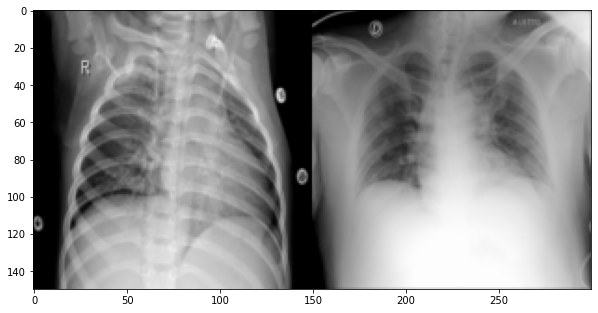

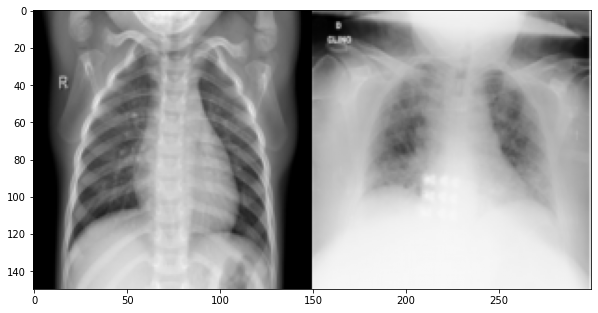

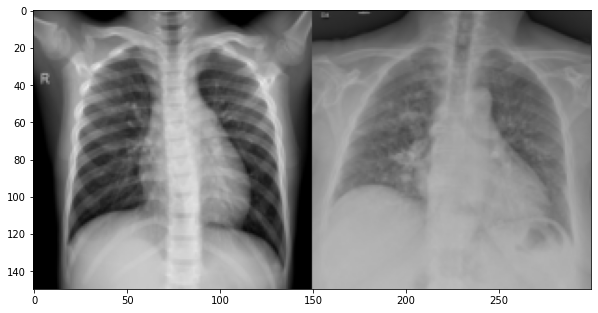

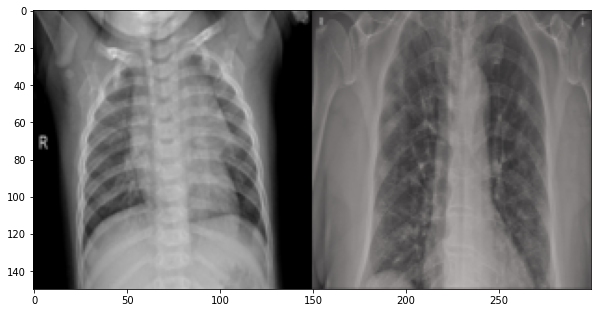

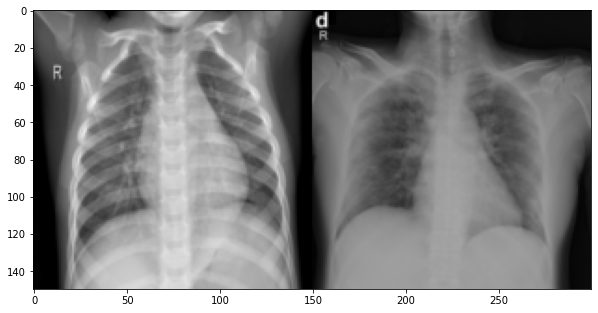

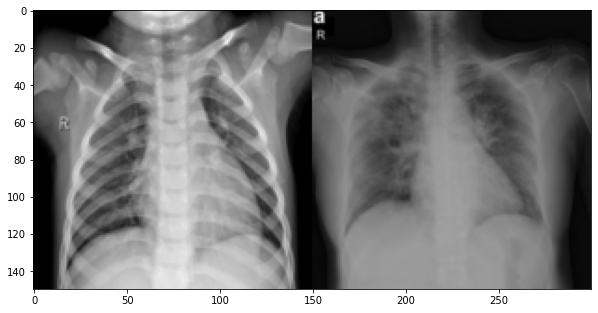

In [ ]:
import skimage
import skimage.transform
def plotter(num):
  normal = cv2.imread(data_d+"/Normal//"+N_images[num])
  normal = skimage.transform.resize(normal,(150,150),mode='reflect')
  corona = cv2.imread(data_d+"/Covid//"+C_images[num])
  corona = skimage.transform.resize(corona,(150,150),mode='reflect')
  pair = np.concatenate((normal,corona),axis=1)
  plt.figure(figsize=(10,8))
  plt.imshow(pair)
  plt.show()
for i in range(6):
  plotter(i)


In [ ]:
LB = LabelBinarizer()

labels = LB.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(data,labels,random_state=42,test_size=0.2,stratify=labels)


In [ ]:
xtrain.shape

(160, 224, 224, 3)

In [ ]:
ytrain.shape

(160, 2)

In [ ]:
ytest.shape

(40, 2)

In [ ]:
## CReating more data
trainAug = ImageDataGenerator(rotation_range=15,fill_mode='nearest')
 

In [ ]:
trainAug

In [ ]:
bmodel = VGG16(weights='imagenet',include_top=False,input_tensor=Input((224,224,3)))


58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
bmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
hmodel = bmodel.output
hmodel=AveragePooling2D((4,4))(hmodel)
hmodel = Flatten(name='flatten')(hmodel)
hmodel = Dense(64,activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation='softmax')(hmodel)

model = Model(bmodel.input,hmodel)

for layer in bmodel.layers:
  layer.trainable=False

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
INIT_LR = 1e-3
EPOCHS = 10
BS=10


In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(xtrain, ytrain, batch_size=BS),
    steps_per_epoch=len(xtrain) // BS,
    validation_data=(xtest, ytest),
    
    epochs=EPOCHS)

Compiling Starts
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
16/16 [==============================] - 92s 6s/step - loss: 0.6917 - accuracy: 0.6187 - val_loss: 0.5663 - val_accuracy: 0.8000
Epoch 2/10
16/16 [==============================] - 92s 6s/step - loss: 0.5972 - accuracy: 0.6812 - val_loss: 0.4347 - val_accuracy: 0.9750
Epoch 3/10
16/16 [==============================] - 92s 6s/step - loss: 0.4231 - accuracy: 0.8938 - val_loss: 0.3428 - val_accuracy: 0.9750
Epoch 4/10
16/16 [==============================] - 92s 6s/step - loss: 0.3880 - accuracy: 0.8750 - val_loss: 0.2804 - val_accuracy: 0.9250
Epoch 5/10
16/16 [==============================] - 92s 6s/step - loss: 0.3428 - accuracy: 0.9125 - val_loss: 0.2342 - val_accuracy: 0.9750
Epoch 6/10
16/16 [==============================] - 92s 6s/step - loss: 0.3037 - accuracy: 0.9187 - val_loss: 0.1998 - val_accuracy: 0.9500
Epoch 7/10
16/16 [==============================] - 92s 6s/step - l

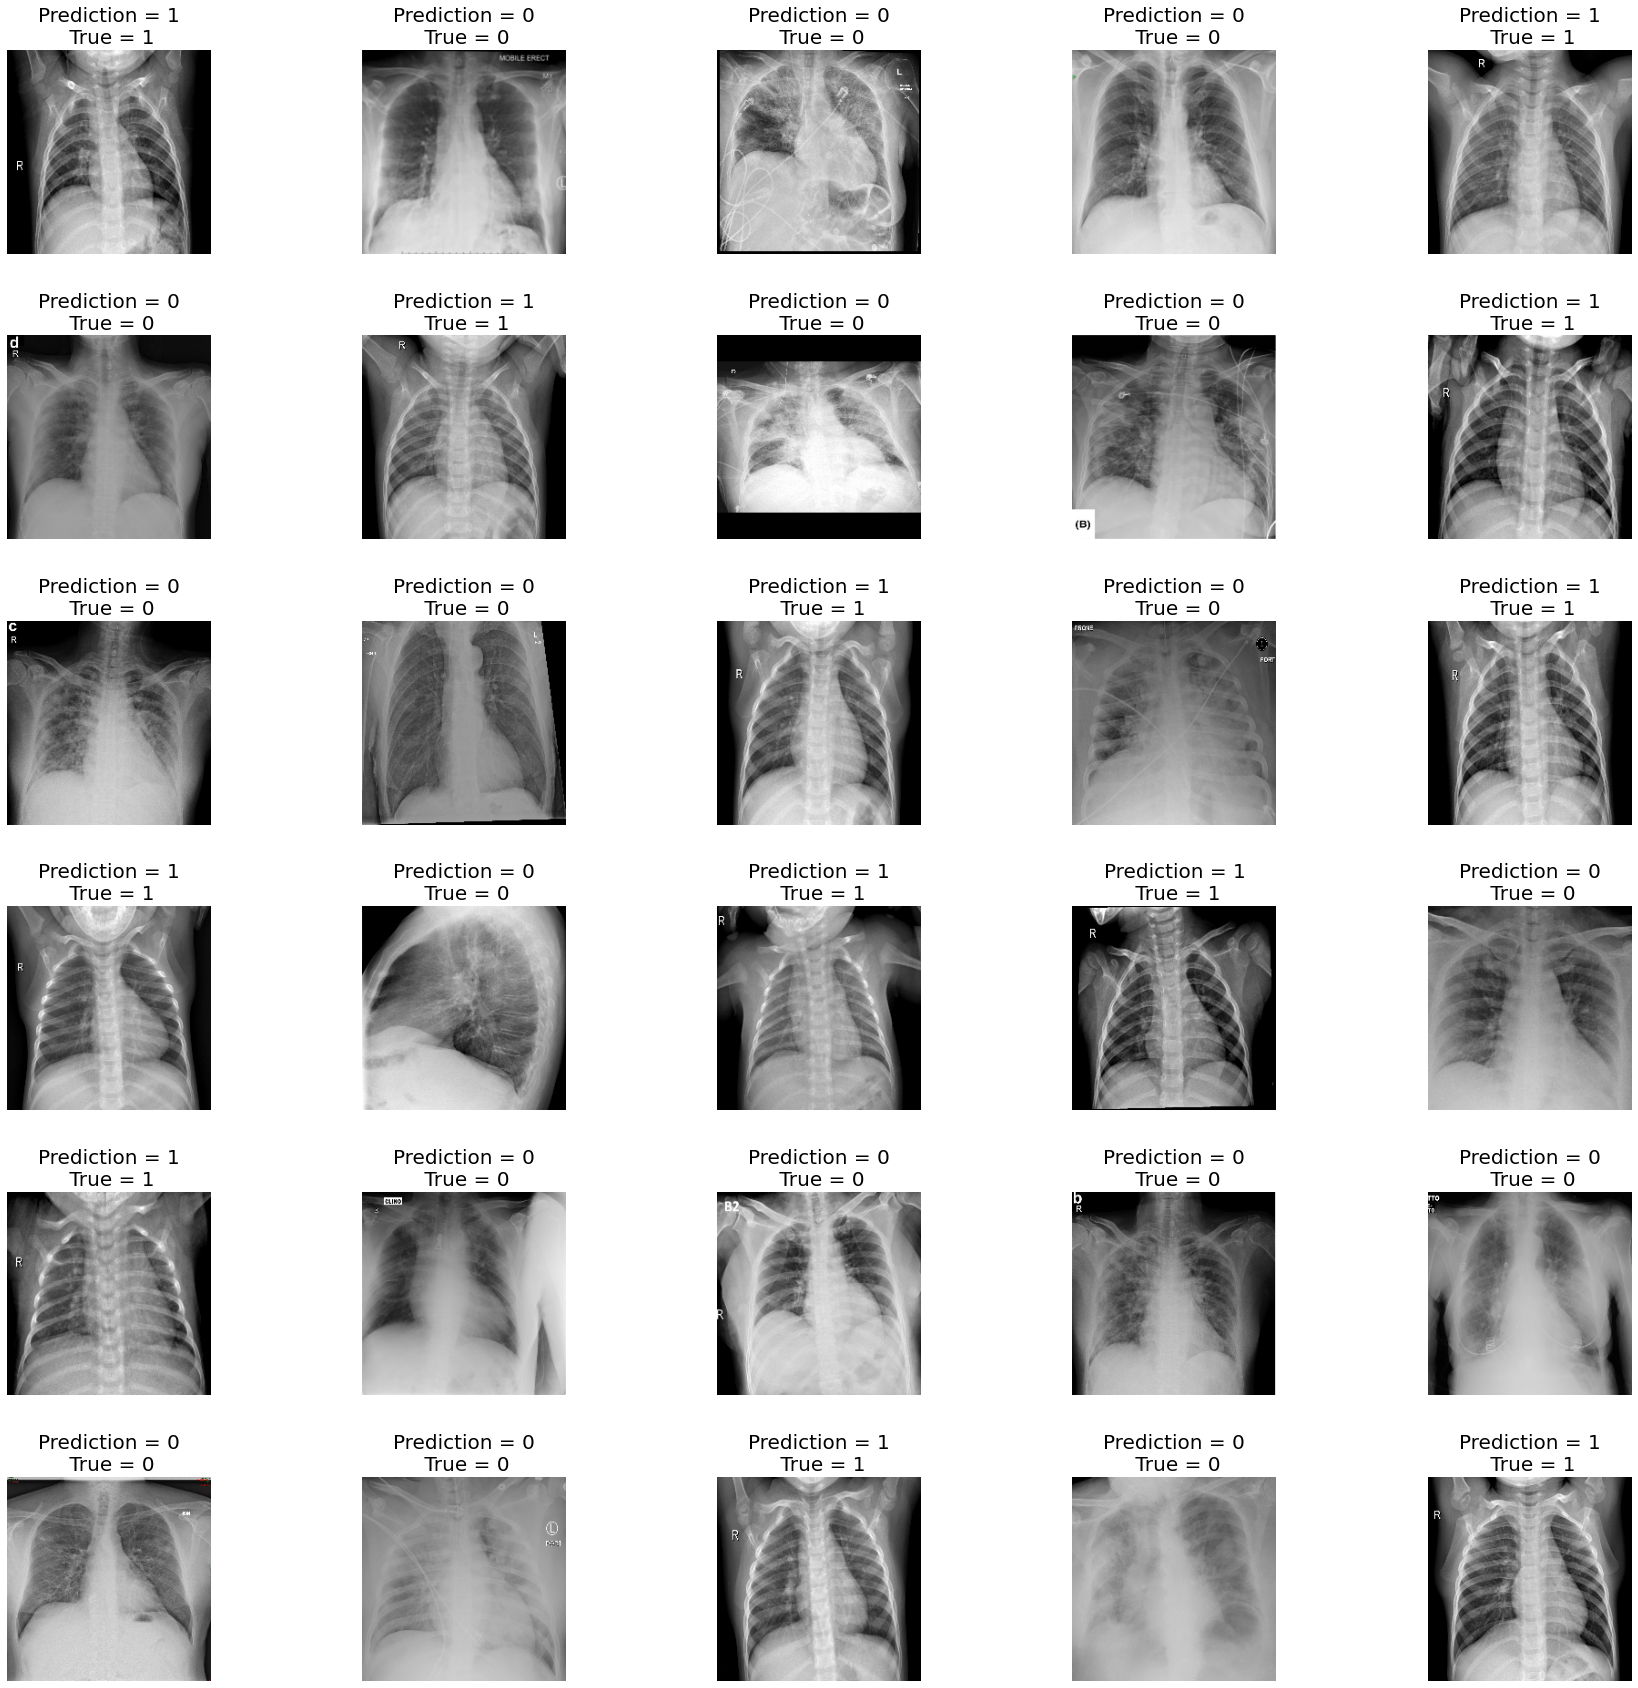

In [ ]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (30, 30))
axes = axes.ravel()
y_pred = model.predict(xtest, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(xtest[i])
    axes[i].set_title(f'Prediction = {y_pred.argmax(axis=1)[i]}\n True = {ytest.argmax(axis=1)[i]}',fontsize=20)
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.4, hspace=0.4)   

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(xtest, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(ytest.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest.argmax(axis=1),y_pred)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[20  0]
 [ 0 20]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


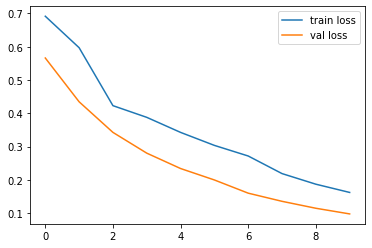

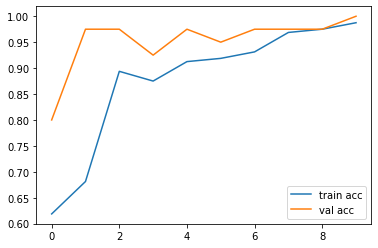

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('Covid_model_working.h5')
# model = tf.keras.models.load_model('Covid_modelt1.h5')

[0]
Prediction: Corona


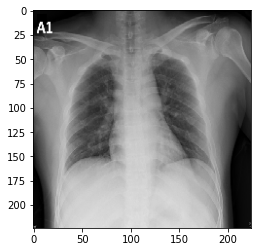

In [36]:

def pred(path):
  import tensorflow as tf 
  from keras.preprocessing import image
  #from keras.models import load_model
  model2 = tf.keras.models.load_model('Covid_model_working.h5')
  from keras.applications.vgg16 import preprocess_input
  img = image.load_img(str(path), target_size=(224, 224)) #insert a random covid-19 x-ray image
  imgplot = plt.imshow(img)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  img_data = preprocess_input(x)
  classes = model2.predict(img_data)
  mostprob = np.argmax(classes, axis=1)
  print(mostprob)
  if New_pred==[1]:
    print('Prediction: Normal')
  else:
    print('Prediction: Corona')

pred('/content/drive/Shared drives/Shared Drive/PYTHON/Data/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png')



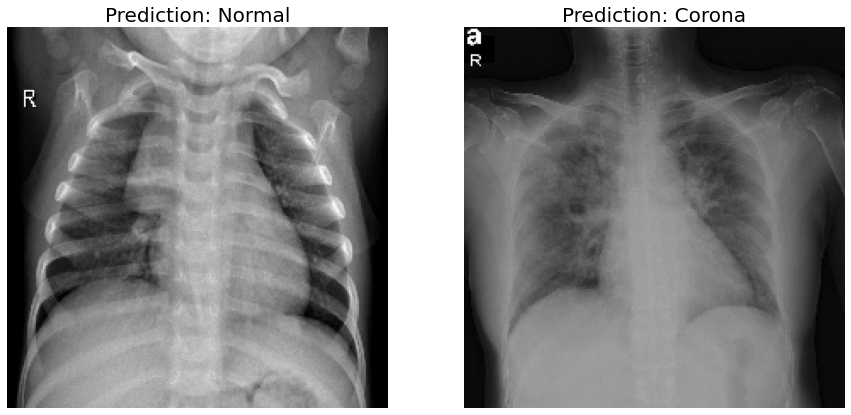

In [65]:

def pred2(path1,path2):
  import tensorflow as tf 
  import os, logging

  os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
  logging.getLogger("tensorflow").setLevel(logging.CRITICAL)
  logging.getLogger("tensorflow_hub").setLevel(logging.CRITICAL)
  from keras.preprocessing import image
  #from keras.models import load_model
  model2 = tf.keras.models.load_model('Covid_model_working.h5')
  from keras.applications.vgg16 import preprocess_input

  ################ LOADING+Processing1st
  img1 = image.load_img(path1, target_size=(224, 224))
  x1 = image.img_to_array(img1)
  x1 = np.expand_dims(x1, axis=0)
  img_data1 = preprocess_input(x1)
  classes1 = model2.predict(img_data1)
  mostprob1 = np.argmax(classes1, axis=1)
  if mostprob1==[1]:
    n1 = 'Prediction: Normal'
  else:
    n1='Prediction: Corona'

  img2 = image.load_img(path2, target_size=(224, 224))
  x2 = image.img_to_array(img2)
  x2 = np.expand_dims(x2, axis=0)

  img_data2 = preprocess_input(x2)
  classes2 = model2.predict(img_data2)
  mostprob2 = np.argmax(classes2, axis=1)
  if mostprob2==[1]:
    n2 = 'Prediction: Normal'
  else:
    n2='Prediction: Corona'
    #####PLOTTING
  fig, axes = plt.subplots(1, 2, figsize = (15, 15))
  axes = axes.ravel()
  # img3 = cv2.hconcat([gamma_two_point_two,gamma_point_four])
  # print(x1.ndim)
  axes[0].imshow(img1)
  axes[0].set_title(f'{n1}',fontsize=20)
  
  axes[1].imshow(img2)
  axes[1].set_title(f'{n2}',fontsize=20)
  axes[0].axis('off')
  axes[1].axis('off')
  
pred2('/content/drive/Shared drives/Shared Drive/PYTHON/Data/Normal/IM-0293-0001.jpeg','/content/drive/Shared drives/Shared Drive/PYTHON/Data/Covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')
  

Prediction: Corona


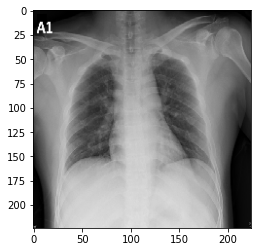

In [ ]:


import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model2 = tf.keras.models.load_model('Covid_model_working.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('/content/drive/Shared drives/Shared Drive/PYTHON/Data/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

In [ ]:
img = image.load_img('/content/drive/Shared drives/Shared Drive/PYTHON/Data/Normal/IM-0162-0001.jpeg', target_size=(224, 224)) #insert a random normal x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')